In [38]:
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import glob
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy import stats

In [37]:
f = open("/home/argo/IMPISH/Data/xray_beam/cryst-out30.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

        Energy    y
0      30.0000 -1.0
1      30.0000 -1.0
2      30.0000 -1.0
3      29.8697 -1.0
4      30.0000 -1.0
...        ...  ...
91522  30.0000 -1.0
91523  30.0000 -1.0
91524  30.0000 -1.0
91525  30.0000 -1.0
91526  30.0000 -1.0

[91527 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

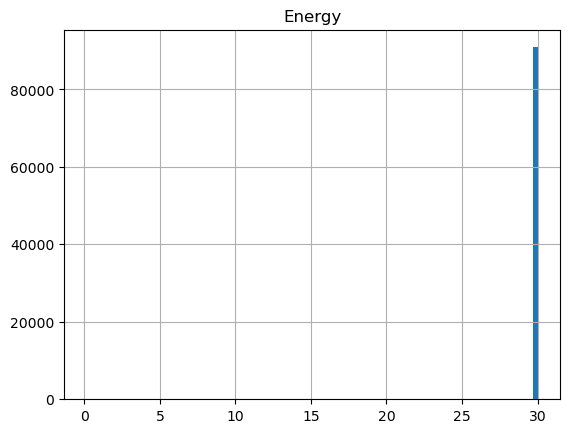

In [43]:
df.hist(column = "Energy", bins = 100)

In [4]:
folder_path = r'/home/argo/IMPISH/Data/xray_beam/'

def xray_tab_combiner(input_directory, output_file):
    headers = []
    rows = []

    #Iterates through all the files in the input directory
    for file_name in os.listdir(input_directory):
        if file_name.endswith('.tab'):
            file_path = os.path.join(input_directory, file_name)

            with open(file_path, 'r', encoding = 'utf-8') as file:
                lines = file.readlines()
                if lines:
                    #Will store the header from the first file
                    if not headers:
                        headers = lines[0].strip().split('\t')
                        rows.append('\t'.join(headers))
                    #Skips the lines in subsequent files (Change to 0 if your files dont have a header)
                    data_lines = lines[0:]
                    rows.extend(data_lines)

    #Writes all rows to an output file
    with open(output_file, 'w', encoding = 'utf-8') as output:
        output.writelines(rows)



In [6]:
xray_tab_combiner(folder_path, 'xrays_combined.tab')

In [7]:
f = open("/home/argo/IMPISH/Data/xray_beam/xrays_combined.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

           Energy    y
0         6.00000 -1.0
1         6.00000 -1.0
2         6.00000 -1.0
3         6.00000 -1.0
4         6.00000 -1.0
...           ...  ...
1144566   2.74751 -1.0
1144567  26.00000 -1.0
1144568  26.00000 -1.0
1144569  26.00000 -1.0
1144570  26.00000 -1.0

[1144571 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

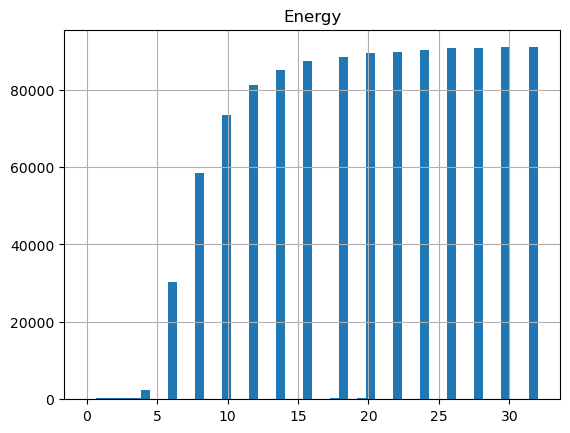

In [9]:
df.hist(column = "Energy", bins = 50)

In [11]:
def find_and_combine_tab_files(root_directory, file_name, output_file):
    headers = []
    rows = []
    header_written = False

    for dirpath, dirnames, filenames in os.walk(root_directory):
        if file_name in filenames:
            file_path = os.path.join(dirpath, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                if lines:
                    if not header_written:
                        headers = lines[0].strip()
                        rows.append(headers)
                        header_written = True
                    rows.extend(lines[0:])
    
    with open(output_file, 'w', encoding='utf-8') as output:
        output.writelines(rows)

In [12]:
root_directory = r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/'
file_name = 'cryst-out.tab'
output_file = r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/xray-energies.tab'

find_and_combine_tab_files(root_directory, file_name, output_file)

In [13]:
xray_tab_combiner(r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/', 'total-xray.tab')

In [15]:
f = open("/home/argo/IMPISH/Data/xray_beam/xray_beam_run/total-xray.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

           Energy    y
0        40.00000 -1.0
1        40.00000 -1.0
2        40.00000 -1.0
3        40.00000 -1.0
4        40.00000 -1.0
...           ...  ...
2709209   2.74751 -1.0
2709210  26.00000 -1.0
2709211  26.00000 -1.0
2709212  26.00000 -1.0
2709213  26.00000 -1.0

[2709214 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

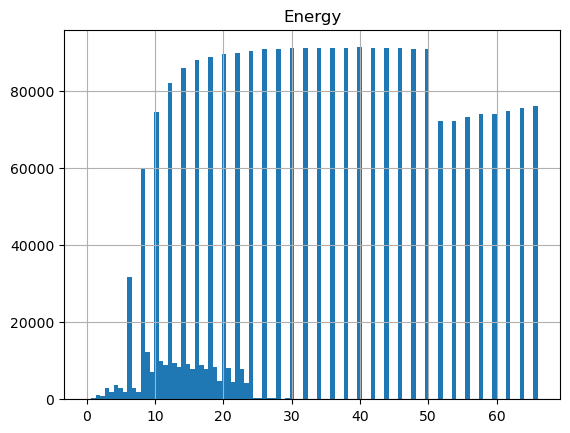

In [16]:
df.hist(column = "Energy", bins = 100, )

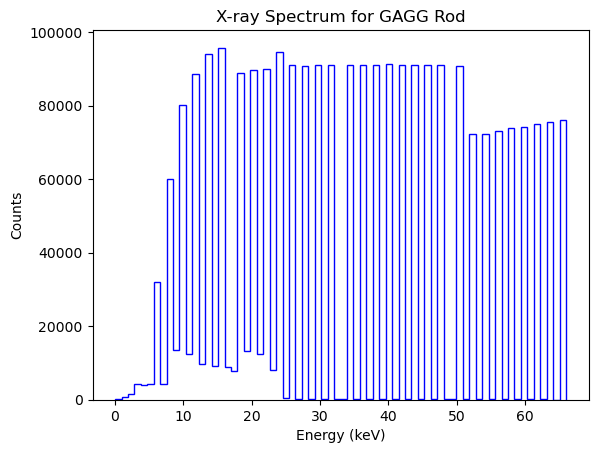

In [20]:
plt.hist(df['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('X-ray Spectrum for GAGG Rod')

plt.show()

In [61]:
lfthick05 = open("/home/argo/IMPISH/Data/LYSO_1SP/lyso-1sp-.3thick-run1-2024-07-01-08:15:41/cryst-out.tab", "r")
ldata05 = lfthick05.read()
#print (data)

ldata05 = ldata05.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldata05 = ldata05.replace(",", ", ") #Adds in space for the data
ldat05 = np.loadtxt(StringIO(ldata05), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldf05 = pd.DataFrame(data = ldat05, columns = hist_values)
print(ldf05)


#Using .1 reflector thickness
lfthick1 = open("/home/argo/IMPISH/Data/LYSO_1SP/lyso-1sp-.1thick-run1-2024-07-01-08:23:40/cryst-out.tab", "r")
ldata1 = lfthick1.read()
#print (data)

ldata1 = ldata1.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldata1 = ldata1.replace(",", ", ") #Adds in space for the data
ldat1 = np.loadtxt(StringIO(ldata1), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldf1 = pd.DataFrame(data = ldat1, columns = hist_values)
print(ldf1)


#Using .5 reflector thickness
lfthick5 = open("/home/argo/IMPISH/Data/LYSO_1SP/lyso-1sp-.5thick-run1-2024-07-01-08:24:42/cryst-out.tab", "r")
ldata5 = lfthick5.read()
#print (data)

ldata5 = ldata5.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldata5 = ldata5.replace(",", ", ") #Adds in space for the data
ldat5 = np.loadtxt(StringIO(ldata5), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldf5 = pd.DataFrame(data = ldat5, columns = hist_values)
print(ldf5)

         Energy    y
0      223.1320 -1.0
1      151.7060 -1.0
2       30.6218 -1.0
3       80.9979 -1.0
4      111.6200 -1.0
...         ...  ...
79001  356.0130 -1.0
79002   30.6218 -1.0
79003   80.9979 -1.0
79004   80.9979 -1.0
79005  386.9920 -1.0

[79006 rows x 2 columns]
          Energy    y
0      223.13200 -1.0
1      111.62000 -1.0
2       30.62180 -1.0
3       80.99790 -1.0
4      195.60600 -1.0
...          ...  ...
80855   13.57610 -1.0
80856   30.62180 -1.0
80857   30.62180 -1.0
80858    4.92286 -1.0
80859  386.99200 -1.0

[80860 rows x 2 columns]
         Energy    y
0      223.1320 -1.0
1       80.9979 -1.0
2       30.6218 -1.0
3      111.6200 -1.0
4      195.6060 -1.0
...         ...  ...
78277  302.8510 -1.0
78278  386.9920 -1.0
78279   65.9731 -1.0
78280   61.2437 -1.0
78281  111.9770 -1.0

[78282 rows x 2 columns]


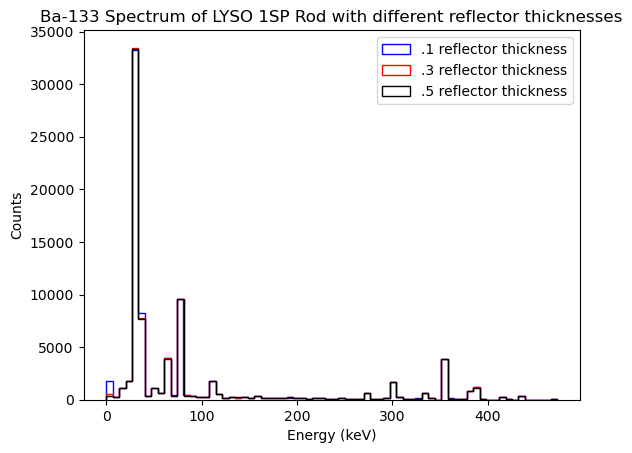

In [62]:
plt.hist(ldf1['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue', label = '.1 reflector thickness')
plt.hist(ldf05['Energy'], bins = 70, histtype = 'step', edgecolor = 'red', label = '.3 reflector thickness')
plt.hist(ldf5['Energy'], bins = 70, histtype = 'step', edgecolor = 'black', label = '.5 reflector thickness')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.title('Ba-133 Spectrum of LYSO 1SP Rod with different reflector thicknesses')

plt.show()

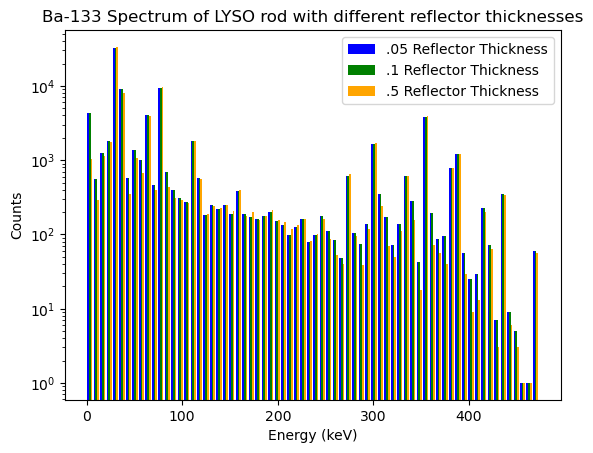

In [14]:
x1 = ldf05['Energy']
x2 = ldf1['Energy']
x3 = ldf5['Energy']

colors = ['blue', 'green', 'orange']
names = ['.05 Reflector Thickness', '.1 Reflector Thickness', '.5 Reflector Thickness']

plt.hist([x1, x2, x3], bins = 70, color = colors, label = names)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.title('Ba-133 Spectrum of LYSO rod with different reflector thicknesses')

plt.show()

# LYSO ASP Rod Reflector Thickness Comparison w/ Ba-133

In [59]:
lfthickasp3 = open("/home/argo/IMPISH/Data/LYSO_ASP/ESR/lyso-asp-.3thick-run1-2024-07-01-08:06:11/cryst-out.tab", "r")
ldataasp3 = lfthickasp3.read()
#print (data)

ldataasp3 = ldataasp3.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldataasp3 = ldataasp3.replace(",", ", ") #Adds in space for the data
ldatasp3 = np.loadtxt(StringIO(ldataasp3), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldfasp3 = pd.DataFrame(data = ldatasp3, columns = hist_values)
print(ldfasp3)


#Using .1 reflector thickness
lfthickasp1 = open("/home/argo/IMPISH/Data/LYSO_ASP/ESR/lyso-asp-.1thick-run1-2024-07-01-08:07:11/cryst-out.tab", "r")
ldataasp1 = lfthickasp1.read()
#print (data)

ldataasp1 = ldataasp1.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldataasp1 = ldataasp1.replace(",", ", ") #Adds in space for the data
ldatasp1 = np.loadtxt(StringIO(ldataasp1), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldfasp1 = pd.DataFrame(data = ldatasp1, columns = hist_values)
print(ldfasp1)


#Using .5 reflector thickness
lfthickasp5 = open("/home/argo/IMPISH/Data/LYSO_ASP/ESR/lyso-asp-.5thick-run1-2024-07-01-08:05:18/cryst-out.tab", "r")
ldataasp5 = lfthickasp5.read()
#print (data)

ldataasp5 = ldataasp5.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldataasp5 = ldataasp5.replace(",", ", ") #Adds in space for the data
ldatasp5 = np.loadtxt(StringIO(ldataasp5), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldfasp5 = pd.DataFrame(data = ldatasp5, columns = hist_values)
print(ldfasp5)

         Energy    y
0      223.1320 -1.0
1      111.6200 -1.0
2       30.9789 -1.0
3       35.5447 -1.0
4      195.6060 -1.0
...         ...  ...
80806   30.9789 -1.0
80807  302.8510 -1.0
80808   34.9943 -1.0
80809   61.2437 -1.0
80810  111.9770 -1.0

[80811 rows x 2 columns]
          Energy    y
0      223.13200 -1.0
1       35.54470 -1.0
2       80.99790 -1.0
3       30.97890 -1.0
4       30.62180 -1.0
...          ...  ...
82877   13.57610 -1.0
82878   30.62180 -1.0
82879   30.62180 -1.0
82880    4.92286 -1.0
82881  386.99200 -1.0

[82882 rows x 2 columns]
         Energy    y
0      223.1320 -1.0
1      111.6200 -1.0
2       30.9789 -1.0
3       30.9789 -1.0
4      151.7060 -1.0
...         ...  ...
79751  111.3030 -1.0
79752   30.9789 -1.0
79753  386.9920 -1.0
79754   61.6007 -1.0
79755  232.6210 -1.0

[79756 rows x 2 columns]


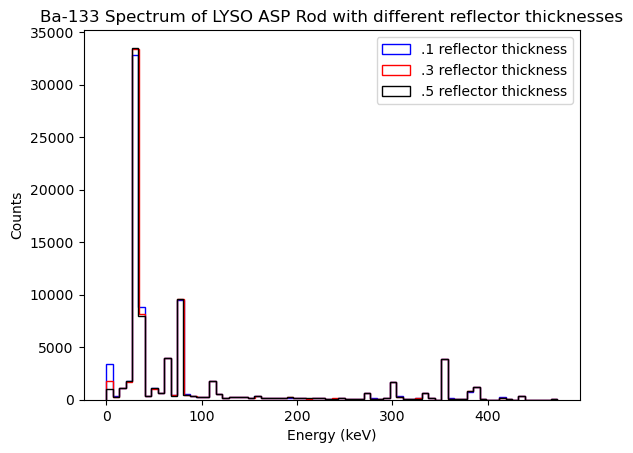

In [60]:
plt.hist(ldfasp1['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue', label = '.1 reflector thickness')
plt.hist(ldfasp3['Energy'], bins = 70, histtype = 'step', edgecolor = 'red', label = '.3 reflector thickness')
plt.hist(ldfasp5['Energy'], bins = 70, histtype = 'step', edgecolor = 'black', label = '.5 reflector thickness')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.title('Ba-133 Spectrum of LYSO ASP Rod with different reflector thicknesses')

plt.show()

# GAGG ASP Rod Reflector Thickness Comparison w/ Ba-133

In [53]:
#Using .1 reflector thickness
gfthickasp1 = open("/home/argo/IMPISH/Data/GAGG_ASP/ESR/gagg-asp-.1thick-run1-2024-07-01-08:01:11/cryst-out.tab", "r")
gdataasp1 = gfthickasp1.read()
#print (data)

gdataasp1 = gdataasp1.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
gdataasp1 = gdataasp1.replace(",", ", ") #Adds in space for the data
gdatasp1 = np.loadtxt(StringIO(gdataasp1), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

gdfasp1 = pd.DataFrame(data = gdatasp1, columns = hist_values)
print(gdfasp1)

#Using .3 reflector thickness
gfthickasp3 = open("/home/argo/IMPISH/Data/GAGG_ASP/ESR/gagg-asp-.3thick-run1-2024-07-01-08:02:49/cryst-out.tab", "r")
gdataasp3 = gfthickasp3.read()
#print (data)

gdataasp3 = gdataasp3.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
gdataasp3 = gdataasp3.replace(",", ", ") #Adds in space for the data
gdatasp3 = np.loadtxt(StringIO(gdataasp3), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

gdfasp3 = pd.DataFrame(data = gdatasp3, columns = hist_values)
print(gdfasp3)


#Using .5 reflector thickness
gfthickasp5 = open("/home/argo/IMPISH/Data/GAGG_ASP/ESR/gagg-asp-.5thick-run1-2024-07-01-08:04:00/cryst-out.tab", "r")
gdataasp5 = gfthickasp5.read()
#print (data)

gdataasp5 = gdataasp5.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
gdataasp5 = gdataasp5.replace(",", ", ") #Adds in space for the data
gdatasp5 = np.loadtxt(StringIO(gdataasp5), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

gdfasp5 = pd.DataFrame(data = gdatasp5, columns = hist_values)
print(gdfasp5)

         Energy    y
0      217.0510 -1.0
1      103.5370 -1.0
2      356.0130 -1.0
3       30.9789 -1.0
4       35.5447 -1.0
...         ...  ...
81677   30.9789 -1.0
81678  111.9770 -1.0
81679  103.0530 -1.0
81680   80.9979 -1.0
81681   80.9979 -1.0

[81682 rows x 2 columns]
         Energy    y
0      217.0510 -1.0
1      195.6060 -1.0
2       80.9979 -1.0
3      111.6200 -1.0
4       30.6218 -1.0
...         ...  ...
79566   30.9789 -1.0
79567  302.8510 -1.0
79568   65.9732 -1.0
79569   61.2437 -1.0
79570  111.9770 -1.0

[79571 rows x 2 columns]
         Energy    y
0      217.0510 -1.0
1       30.9789 -1.0
2      195.6060 -1.0
3       80.9979 -1.0
4      103.5370 -1.0
...         ...  ...
78466   30.9789 -1.0
78467  302.8510 -1.0
78468   65.9732 -1.0
78469   61.2437 -1.0
78470  111.9770 -1.0

[78471 rows x 2 columns]


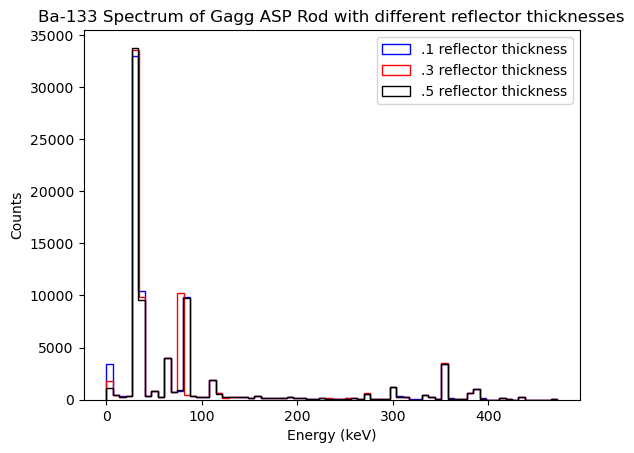

In [54]:
plt.hist(gdfasp1['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue', label = '.1 reflector thickness')
plt.hist(gdfasp3['Energy'], bins = 70, histtype = 'step', edgecolor = 'red', label = '.3 reflector thickness')
plt.hist(gdfasp5['Energy'], bins = 70, histtype = 'step', edgecolor = 'black', label = '.5 reflector thickness')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.title('Ba-133 Spectrum of Gagg ASP Rod with different reflector thicknesses')

plt.show()

# GAGG 1SP Rod Reflector Thickness Comparison w/ Ba-133 

In [55]:
#Using .1 reflector thickness
gfthick1sp1 = open("/home/argo/IMPISH/Data/GAGG_1SP/gagg-1sp-.1thick-run1-2024-07-01-07:25:53/cryst-out.tab", "r")
gdata1sp1 = gfthick1sp1.read()
#print (data)

gdata1sp1 = gdata1sp1.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
gdata1sp1 = gdata1sp1.replace(",", ", ") #Adds in space for the data
gdat1sp1 = np.loadtxt(StringIO(gdata1sp1), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

gdf1sp1 = pd.DataFrame(data = gdat1sp1, columns = hist_values)
print(gdf1sp1)

#Using .3 reflector thickness
gfthick1sp3 = open("/home/argo/IMPISH/Data/GAGG_1SP/gagg-1sp-.3thick-run1-2024-07-01-07:24:30/cryst-out.tab", "r")
gdata1sp3 = gfthick1sp3.read()
#print (data)

gdata1sp3 = gdata1sp3.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
gdata1sp3 = gdata1sp3.replace(",", ", ") #Adds in space for the data
gdat1sp3 = np.loadtxt(StringIO(gdata1sp3), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

gdf1sp3 = pd.DataFrame(data = gdat1sp3, columns = hist_values)
print(gdf1sp3)


#Using .5 reflector thickness
gfthick1sp5 = open("/home/argo/IMPISH/Data/GAGG_1SP/gagg-1sp-.5thick-run1-2024-07-01-07:23:30/cryst-out.tab", "r")
gdata1sp5 = gfthick1sp5.read()
#print (data)

gdata1sp5 = gdata1sp5.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
gdata1sp5 = gdata1sp5.replace(",", ", ") #Adds in space for the data
gdat1sp5 = np.loadtxt(StringIO(gdata1sp5), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

gdf1sp5 = pd.DataFrame(data = gdat1sp5, columns = hist_values)
print(gdf1sp5)

         Energy    y
0      217.0510 -1.0
1      111.6200 -1.0
2      195.6060 -1.0
3       30.6218 -1.0
4       34.9255 -1.0
...         ...  ...
79654  252.6710 -1.0
79655   30.9789 -1.0
79656  386.9920 -1.0
79657   61.6007 -1.0
79658  383.8490 -1.0

[79659 rows x 2 columns]
         Energy    y
0      217.0510 -1.0
1      195.6060 -1.0
2      103.5370 -1.0
3       80.9979 -1.0
4       30.6218 -1.0
...         ...  ...
77781   30.9789 -1.0
77782  302.8510 -1.0
77783   34.9943 -1.0
77784   61.2437 -1.0
77785  111.9770 -1.0

[77786 rows x 2 columns]
         Energy    y
0       30.9789 -1.0
1      217.0510 -1.0
2      126.2680 -1.0
3      111.6200 -1.0
4      103.5370 -1.0
...         ...  ...
77051   30.9789 -1.0
77052  302.8510 -1.0
77053   34.9943 -1.0
77054   61.2437 -1.0
77055  111.9770 -1.0

[77056 rows x 2 columns]


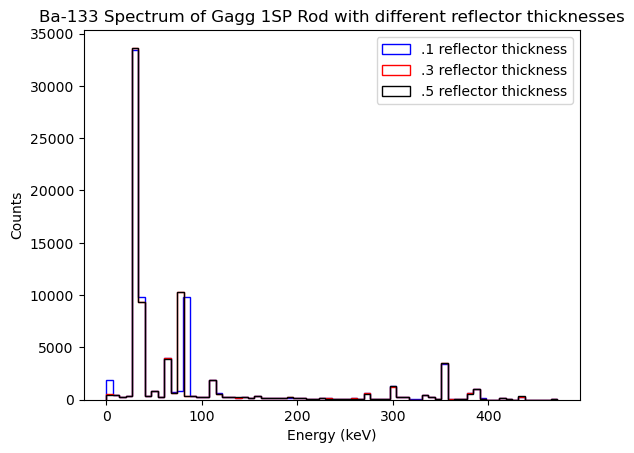

In [56]:
plt.hist(gdf1sp1['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue', label = '.1 reflector thickness')
plt.hist(gdf1sp3['Energy'], bins = 70, histtype = 'step', edgecolor = 'red', label = '.3 reflector thickness')
plt.hist(gdf1sp5['Energy'], bins = 70, histtype = 'step', edgecolor = 'black', label = '.5 reflector thickness')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.title('Ba-133 Spectrum of Gagg 1SP Rod with different reflector thicknesses')

plt.show()

## Do some thicknesses between .1 and .5. Might be able to see something else. .1 and .05 did not really give much of a difference, .1 gave more detections at the lowest energies so maybe rerun and see if that occurs again.

# Comparison between LYSO and GAGG ESR ASP Rod Ba-133 Spectrum

In [34]:
crystal_config = []
def crystal_data(crystal_config, path):
    
    #c = str(crystal_config)
    f = open(path + "/cryst-out.tab", "r")
    data = f.read()
    #print (data)
    
    data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
    data = data.replace(",", ", ") #Adds in space for the data
    dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
    #print(dat.shape)
    #print(dat)
    
    hist_values = ["Energy", "y"]
    
    crystal_config = pd.DataFrame(data = dat, columns = hist_values)
    print(crystal_config)
    return crystal_config

In [36]:
crystal_data("lyso_aspESR", "/home/argo/IMPISH/Data/gagg-asp-run1-2024-06-18-15:02:51/")

         Energy    y
0      217.0510 -1.0
1       30.9789 -1.0
2      156.8900 -1.0
3      103.5370 -1.0
4       80.9979 -1.0
...         ...  ...
81677   30.9789 -1.0
81678  111.9770 -1.0
81679  103.0530 -1.0
81680   80.9979 -1.0
81681   80.9979 -1.0

[81682 rows x 2 columns]


NameError: name 'lyso_aspESR' is not defined

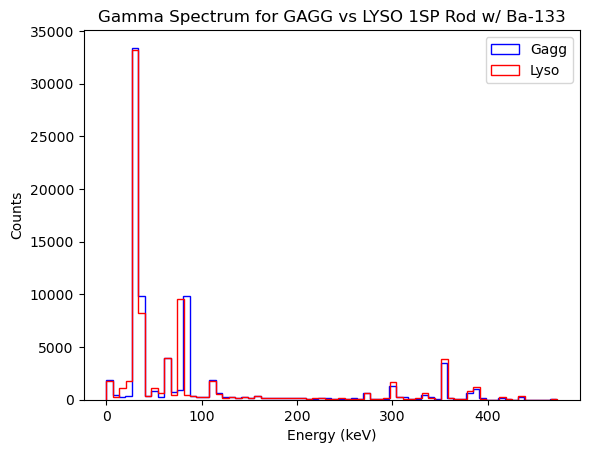

In [64]:
plt.hist(gdf1sp1['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue', label = 'Gagg')
plt.hist(ldf1['Energy'], bins = 70, histtype = 'step', edgecolor = 'red', label = 'Lyso')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.title('Gamma Spectrum for GAGG vs LYSO 1SP Rod w/ Ba-133')

plt.show()

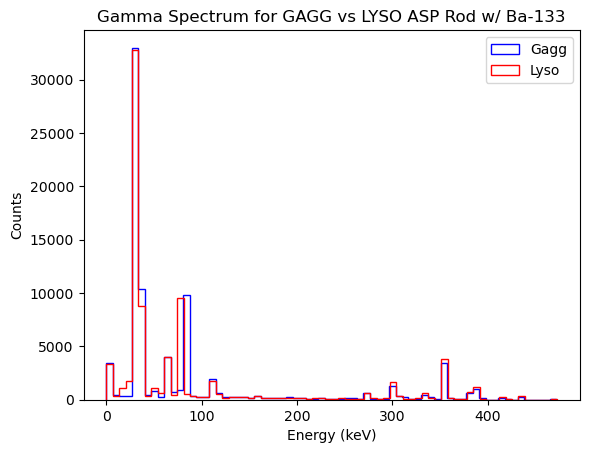

In [65]:
plt.hist(gdfasp1['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue', label = 'Gagg')
plt.hist(ldfasp1['Energy'], bins = 70, histtype = 'step', edgecolor = 'red', label = 'Lyso')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.title('Gamma Spectrum for GAGG vs LYSO ASP Rod w/ Ba-133')

plt.show()